In [3]:
import numpy as np
import torch
from sklearn.model_selection import train_test_split

from logistic_regression import LogisticRegressionNesterov
from extrapolation import *
from experiments import OnlineExperiment

In [4]:
device = "cuda"

X = []
with open("../madelon_train.data") as f:
    for line in f:
        X.append([float(x) for x in line.split()])
X = np.array(X)
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X = torch.tensor(X, device=device)
with open("../madelon_train.labels") as f:
    y = [int(x) for x in f]
y = torch.tensor(y, device=device)
X.shape, y.shape

(torch.Size([2000, 501]), torch.Size([2000]))

In [5]:
np.random.seed(2020)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

$\tau = 10^2$

In [6]:
model = LogisticRegressionNesterov(X_train, y_train, 1e2, device=device)

In [7]:
model.run_steps(50500)

In [8]:
len(model.y_log)

50501

In [9]:
preds = model.predict(X_test)
torch.mean((preds == y_test).double())

tensor(0.5750, device='cuda:0', dtype=torch.float64)

In [12]:
model.to("cpu")

In [13]:
experiment = OnlineExperiment(model, 5, device="cpu")

In [14]:
experiment.run_method("Online RNA", mixing_RNA, 50000, method_kwargs={"lambda_": 1e-5, "beta": 0.})

In [15]:
experiment.run_method("Online RNA+mixing", mixing_RNA, 50000, method_kwargs={"lambda_": 1e-5, "beta": 0.5})

In [16]:
experiment.run_method("Online RNA+Nesterov", optimal_RNA, 50000, 
                      method_kwargs={"lambda_": 1e-10, "alpha": model.alpha, "beta": model.beta})

In [17]:
experiment.save("madelon-online-1e2.p")

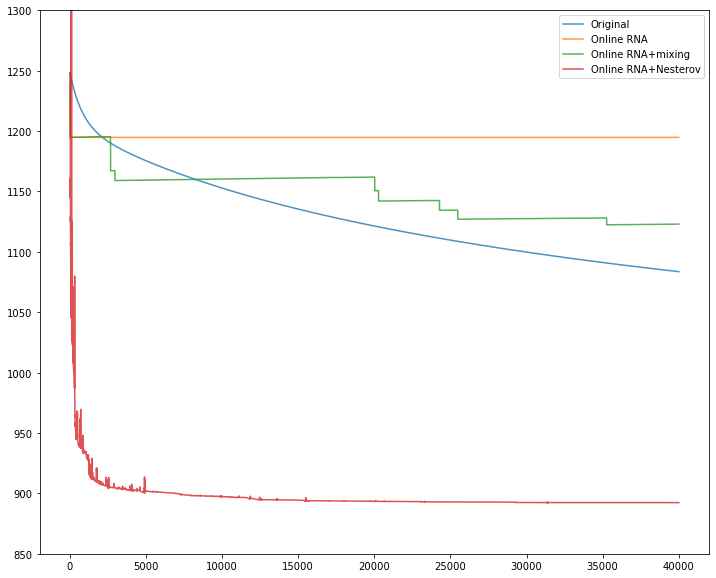

In [18]:
experiment.plot_values(n=40000, figsize=(12, 10), ylim=(850, 1300))

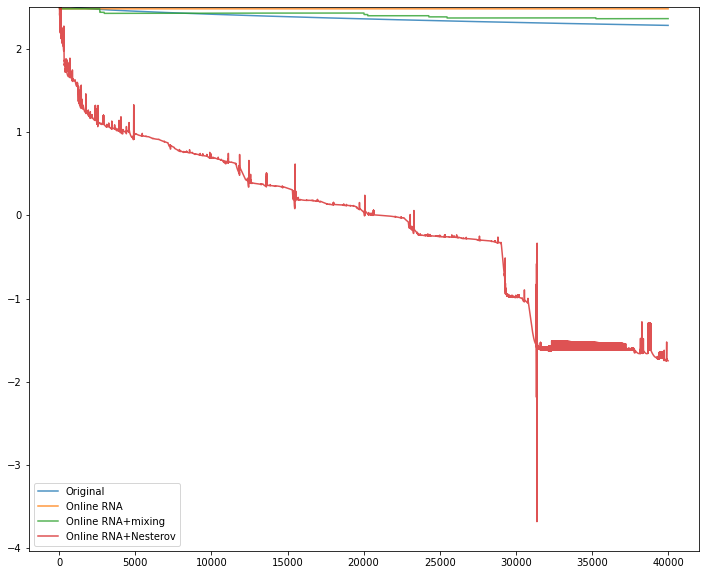

In [19]:
experiment.plot_log_diff(n=40000, figsize=(12, 10), ylim=(None, 2.5))